---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [6]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [7]:
'''
def add_num_column():
    n = 0
    for i,r in df.iterrows():
        n += 1
        df['Number'] = [n,n,n]
    return df
add_num_column()
'''
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [8]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [9]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [ ]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

In [10]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [11]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True) #outer join 把所有行列都合并进来

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [12]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True) 
#inner join 只有两个df里面重叠（index名一样）的部分才会被合并

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [13]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True) #left join只包含所有左侧df的index

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [14]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)#right join只包含所有右侧df的index

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [15]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name') #也可以使用column名，比如Name这个column

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [19]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')
# 如果两个df出现了相同column，且这个column不是用来匹配的column，那么结果中会将两个重名的column分别重命名为 ‘原名_x’ 和 ‘原名_y’， 
# 其中x指左边的，y右边。这个是默认的设置，你也可以自行定义如何重命名

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [ ]:
# 如果两个df，一个的index名称和另一个df的某一个column名称相同，则可以使用 left_index = True, right_on = '相同的名字'
# 假设左边的是index名，右边的是column名

In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])
# 对于人名相同但实际不是同一个人的情况，使用姓和名两个column来共同做匹配

# Idiomatic Pandas: Making Code Pandorable

In [ ]:
# If you see a ][ you should think carefully about what you are doing

In [25]:
import pandas as pd
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [28]:
# 用一个括号括起来，就可以把dataframe后面接续的多个attribution分行写，这种写法非常优美 pandorable
(
    df.where(df['SUMLEV']==50)
    .dropna() #丢掉na值（n/a）
    .set_index(['STNAME','CTYNAME']) #将某column设为index
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}) #column重命名
    .head()
) 


SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County        54571.0              54571.0          54660.0   
        Baldwin County       182265.0             182265.0         183193.0   
        Barbour County        27457.0              27457.0          27341.0   
        Bibb County           22915.0              22919.0          22861.0   
        Blount County         57322.0              57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County          55253.0          55175.0     ...        
        Baldwin County         186659.0         190396.0     ...        
        Barbour County          27226.0          27159.0     ...        
        Bibb County             22733.0          22642.0     ...        
        Blount County           57711.0          57776.0     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [29]:
# 不如上面的代码更r
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County          54571              54571            54660   
        Baldwin County         182265             182265           183193   
        Barbour County          27457              27457            27341   
        Bibb County             22915              22919            22861   
        Blount County           57322              57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County            55253            55175     ...        
        Baldwin County           186659           190396     ...        
        Barbour County            27226            27159     ...        
        Bibb County               22733            22642     ...        
        Blount County             57711            57776     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [38]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [41]:
df.apply(min_max, axis=1).head()
#min_max('POPESTIMATE2010').head()

min       max
STNAME  CTYNAME                           
Alabama Autauga County   54660.0   55347.0
        Baldwin County  183193.0  203709.0
        Barbour County   26489.0   27341.0
        Bibb County      22512.0   22861.0
        Blount County    57373.0   57776.0

In [43]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County        54571.0            54571.0          54660.0   
        Baldwin County       182265.0           182265.0         183193.0   
        Barbour County        27457.0            27457.0          27341.0   
        Bibb County           22915.0            22919.0          22861.0   
        Blount County         57322.0            57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012    ...     \
STNAME  CTYNAME                                             ...      
Alabama Autauga County          55253.0          55175.0    ...      
        Baldwin County         186659.0         190396.0    ...      
        Barbour County          27226.0          27159.0    ...      
        Bibb County             22733.0          22642.0    ...      
        Blount County           57711.0          57776.0    ...      

                        RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
STNAME  CTYNAME                                                                
Alabama Autauga County         -3.012349          2.265971         -2.530799   
        Baldwin County         21.845705         19.243287         17.197872   
        Barbour County         -7.056824         -3.904217        -10.543299   
        Bibb County            -6.201001         -0.177537          0.177258   
        Blount County          -1.748766         -2.062535         -1.369970   

                        RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
STNAME  CTYNAME                                                              
Alabama Autauga County     7.606016    -2.626146    -2.722002     2.592270   
        Baldwin County    15.844176    18.559627    22.727626    20.317142   
        Barbour County    -4.874741    -2.758113    -7.167664    -3.978583   
        Bibb County       -5.088389    -4.363636    -5.403729     0.754533   
        Blount County      1.859511    -0.848580    -1.402476    -1.577232   

                        RNETMIG2015       max       min  
STNAME  CTYNAME                                          
Alabama Autauga County    -2.187333   55347.0   54660.0  
        Baldwin County    18.293499  203709.0  183193.0  
        Barbour County   -10.543299   27341.0   26489.0  
        Bibb County        1.107861   22861.0   22512.0  
        Blount County     -0.884411   57776.0   57373.0  

[5 rows x 100 columns]

In [45]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)
#上面的类型是： <class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>


# Group by

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

df.head() #完整的有3142行

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [15]:
%%timeit -n 10 #对下面的代码计时，一共10个loop
# 结果(完整版，不含head（））： 1.04 s ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

for state in df.head()['STNAME'].unique(): #不重复的  head()是我自己加的，源代码没有
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alabama have an aver

In [28]:
#%%timeit -n 10
#结果（完整版，不含head（））： 20.6 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
for group, frame in df.head(100).groupby('STNAME'): # head()是我自己加的，源代码没有
    
#上面：.groupby() 的第一个key是groupby所针对的那个column的值，即‘STNAME’的value。
#     frame则是对应每个group值下的所有内容，包括所有行和列
    print(group,'\n') #另起一行，换行符：\n
    print(frame)
#    avg = np.average(frame['CENSUS2010POP'])
#    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Alabama 

    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
6       50       3         6      1      11  Alabama     Bullock County   
7       50       3         6      1      13  Alabama      Butler County   
8       50       3         6      1      15  Alabama     Calhoun County   
9       50       3         6      1      17  Alabama    Chambers County   
10      50       3         6      1      19  Alabama    Cherokee County   
11      50       3         6      1      21  Alabama     Chilton County   
12      50       3         6      1      23  Alabama     Choctaw County   
13      50     

In [29]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [30]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [31]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [32]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}) #agg是aggregate的缩写，agg()内跟一个dict

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [38]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

#运行结果：
#<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
#<class 'pandas.core.groupby.groupby.SeriesGroupBy'>

df.groupby(level=1)['POPESTIMATE2010','POPESTIMATE2011']
#返回错误：ValueError: level > 0 or level < -1 only valid with  MultiIndex
#也就是说level = 0 就是针对单index的df，而上面改成level = 1，不符合实际情况了，所以报错

df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.groupby.SeriesGroupBy'>


In [45]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))
#这个就是针对seires的groupby，SeriesGroupBy
#因为groupby的结果只有一个column：'CENSUS2010POP'，所以名字直接被改掉了，改为 avg和sum

/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [42]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum})) #重新命名：avg，和sum，在结果中是以两级column name的形式呈现的
#因为groupby针对的是两个column：'POPESTIMATE2010','POPESTIMATE2011'，所以计算avg和sum的同时，不能丢掉这两个名字，
#所以column name变成了两层

/Users/xiucat/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [43]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))
#上面：针对dataframe，没有renaming，所以没有提示futurewarning

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Scales

In [46]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [47]:
df['Grades'].astype('category').head() #将Grades的类型设置为category

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [65]:
#正确的order：
#Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

#FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; 
#pass a CategoricalDtype instead


/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [64]:
# 根据上面的futurewarning提示，将代码改成直接pass CategoricalDtype()数据：
'''下面代码有问题，没有成功排序ordered，错误的order如下：'''
# Categories (11, object): [A < A+ < A- < B ... C+ < C- < D < D+]

grades = df['Grades'].astype('category',
                             pd.api.types.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']
                             ),ordered=True)#ordered=True
grades.head()

/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A < A+ < A- < B ... C+ < C- < D < D+]

In [66]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [68]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)
#将数值平均分为n等分，n即该代码中的“10”：pd.cut(df['avg'],10)

/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables

In [69]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [70]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [72]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)
#以厂商Make和年份YEAR作为index和column，然后求每年对应厂商的 (kW) 这列数值的平均值 ：aggfunc=np.mean

#pivot_table 可以把某一列column的值变成新的column header

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [74]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)
#代码中加入：margins=True ，下面就加入了 All这个列
#加入了两个function


mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [75]:
import pandas as pd
import numpy as np

### Timestamp

In [77]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [78]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [79]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [81]:
#这个代码的隔断很特别，用逗号。。。
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [82]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [8]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [9]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [84]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,51,47
"Aug 29, 2014",53,39
2015-06-26,60,88
7/12/16,94,62


In [85]:
ts3.index = pd.to_datetime(ts3.index) #可以把不同格式的日期转换成统一格式，email parsing项目用得到
ts3

,a,b
2013-06-02,51,47
2014-08-29,53,39
2015-06-26,60,88
2016-07-12,94,62


In [87]:
pd.to_datetime('4.7.12', dayfirst=True) #如果源数据的时间格式是欧式：日，月，年，则可以单独进行调整

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [88]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016') #两个日期做减法，获得相差时长

Timedelta('2 days 00:00:00')

In [104]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('22Days 3Hours 19minutes') #一个日期加上特定时长,时长单位多样
#时长单位的格式：不区分大小写；d，day，days都可以；h，hour，hours都可以，m,min,minute,minutes都可以；
#不能用月，不能用mins

Timestamp('2016-09-24 11:29:00')

### Working with Dates in a Dataframe

In [105]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')#每两个周日
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [106]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,98,128
2016-10-16,106,128
2016-10-30,115,118
2016-11-13,119,115
2016-11-27,122,124
2016-12-11,125,119
2016-12-25,127,117
2017-01-08,123,118
2017-01-22,128,117


In [107]:
df.index.weekday_name #自动判断dataframe中的日期是星期几

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [108]:
df.diff() #下一个row减去上一个row的差值

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,8.0,0.0
2016-10-30,9.0,-10.0
2016-11-13,4.0,-3.0
2016-11-27,3.0,9.0
2016-12-11,3.0,-5.0
2016-12-25,2.0,-2.0
2017-01-08,-4.0,1.0
2017-01-22,5.0,-1.0


In [109]:
df.resample('M').mean() #查看每月数据的平均值

,Count 1,Count 2
2016-10-31,106.333333,124.666667
2016-11-30,120.500000,119.500000
2016-12-31,126.000000,118.000000
2017-01-31,125.500000,117.500000


In [110]:
df['2017']

,Count 1,Count 2
2017-01-08,123,118
2017-01-22,128,117


In [112]:
df['2016-12']

,Count 1,Count 2
2016-12-11,125,119
2016-12-25,127,117


In [113]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,125,119
2016-12-25,127,117
2017-01-08,123,118
2017-01-22,128,117


In [114]:
df.asfreq('W', method='ffill') #把日期频率变成每周一个，然后新增的日期对应的数据使用填充的方式

,Count 1,Count 2
2016-10-02,98,128
2016-10-09,98,128
2016-10-16,106,128
2016-10-23,106,128
2016-10-30,115,118
2016-11-06,115,118
2016-11-13,119,115
2016-11-20,119,115
2016-11-27,122,124
2016-12-04,122,124


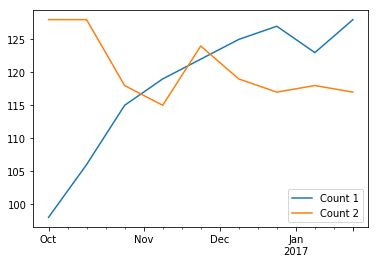

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()